# __Arquitectura de una Red Neuronal Artificial - MLP__

Vamos a entender las redes MLP con ejercicios practicos

## _Ejercicio 1_

Vamos a analizar un problema de clasificacion donde usamos datos tabulares.

#### Que son los datos tabulares?

Son datos que estan almacenados en archivos tipo Excel, CSV, JSON, entre otros y que se pueden representar en tablas donde las columnas son las caracteristicas, y las filas son las muestras o registros.

Vamos a usar la base de datos de [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) de la libreria Scikit-Learn que esta conformada por datos tabulares.

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

> La BD tiene 10 caracteristicas y 442 registros

Vamos a cargar la BD en un formato tabular conocido como DataFrame para visualizar mejor la informacion.

In [2]:
import pandas as pd

df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


#### Como se pasa la informacion de datos tabulares a una red neuronal MLP?

En el siguiente esquema observamos como se hace.

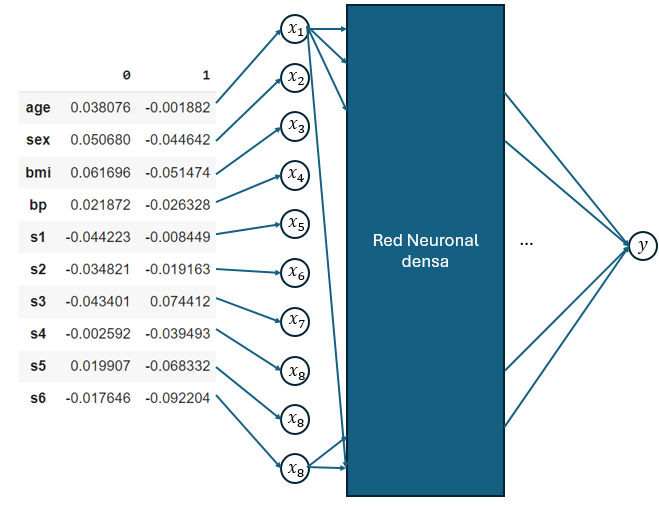

La capa de entrada de la red va a tener tantas neuronas como caractetisticas hayan en los datos tabulares. En este caso la capa debe tener 10 neuronas que es la cantidad de caracteristicas que contiene la BD.

## _Ejercicio 2_

Vamos a crear un modelo de clasificacion para la base de datos <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits" target="_blank">MNIST dataset</a>, el cual es un conjunto de imagenes de numeros del 0 al 9 escritos a mano en escala de grises de 8x8. Pero primero entendamos como se compone una imagen.

#### Como se estructura una imagen?

Las imagenes son arrays anidados con diferentes canales (cada canal representando un color diferente), en esta ocasion el unico canal en el que vienen las imagenes es de la escala de grises, donde cada pixel puede encontrarse entre los valores de 0 a 255, siendo 0 el color negro y 255 el blanco.

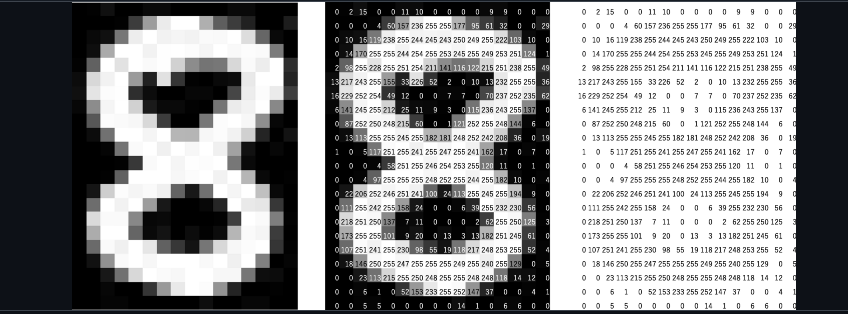

#### Carga y visualizacion de las imagenes

Vamos a cargar las librerias necesarias para subir las imagenes, visualizarlas y hacer operaciones matriciales con estas.

In [1]:
# importar los datos
from sklearn.datasets import load_digits
# instanciamos el objeto que contiene los datos
digits = load_digits()
# mostrar dimensiones de la BD
print(digits.data.shape)

(1797, 64)


> La BD contiene 64 caracteristicas (que en este caso son los pixeles) y 1797 registros.

Mostramos la imagen correspondiente al registro con indice 23

<Figure size 640x480 with 0 Axes>

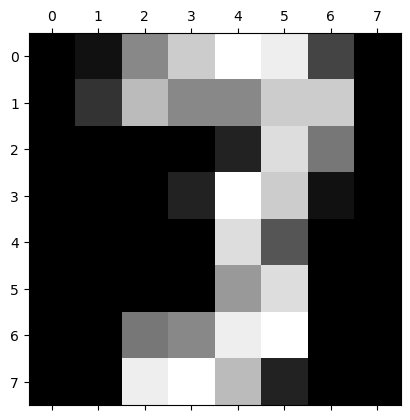

In [ ]:
# importar la libreria para visualizar las imagenes
import matplotlib.pyplot as plt
plt.gray()
# mostrar la imagen contenida en el registro 23
plt.matshow(digits.images[23])
plt.show()

Mostramos los valores de cada pixel de la imagen de indice 23

In [19]:
digits.data[23]

array([ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8.,
       12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,
        0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8.,
       14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.])

Verificamos el numero al que corresponde la imagen con indice 23 mediante su etiqueta

In [20]:
digits.target[23]

3

Mostramos la imagen correspondiente al registro con indice 100

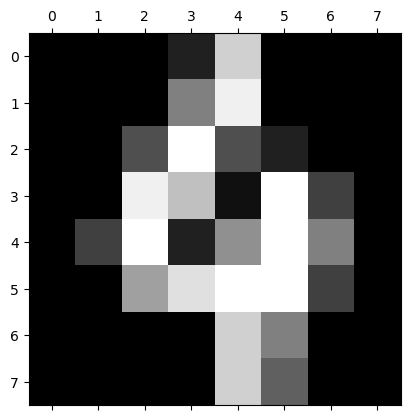

In [10]:
# mostrar la imagen contenida en el registro 100
plt.matshow(digits.images[100])
plt.show()

Mostramos los valores de cada pixel de la imagen con indice 100

In [12]:
digits.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

Verfiquemos cual etiqueta corresponde al registro 100

In [17]:
digits.target[100]

4

Ahora, vamos a mostrar las primera 4 imagenes de la BD con su respectiva etiqueta.

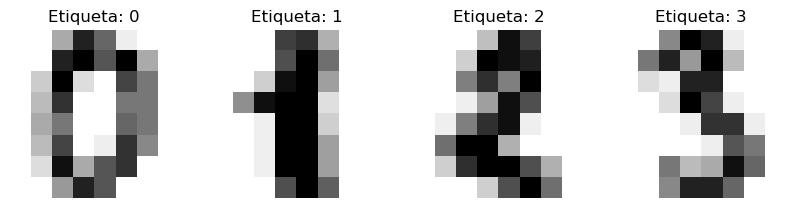

In [24]:
# figura con subgraficos de 1 fila y 4 columnas
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# itera sobre cada subgrafico y los datos
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off() # no mostrar las marcas ni los bordes 
    # imagen en escala de grises con nearest para mostrar pixeles sin suavizado
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    ax.set_title('Etiqueta: %i' % label)


## __Práctica: Clasificación Fashion-MNIST__


Crear un modelo de clasificación para la base de datos <a href="https://github.com/zalandoresearch/fashion-mnist" target="_blank">Fashion-MNIST dataset</a>, el cual es un conjunto de imágenes de ropa en escala de grises de 28x28. Es más complejo que MNIST, por lo que es una mejor representación del rendimiento real de su red.

#### __Importar librerias__



Se cargan las librerías de interés para visualizar las imágenes y hacer operaciones matriciales con estas.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Existe una librería de IA que se llama __Tensorflow__ que sirve para crear y entrenar redes neuronales artificiales, creadapor Google. <a href="https://www.tensorflow.org/" targer="_blank">Link</a>

In [38]:
import tensorflow as tf

#### __Cargar Datos__

Para usar la base de datos Fashion-MNIST, la descargamos desde la misma librería __Tensorflow__ desde su módulo de __datasets__. <a href="https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data" target="_blank">Link</a>. En esta página está la documentación de la base de datos y la forma de usarla.

Esta base de datos contiene 10 clases etiquetadas como se muestra a continuación.

<table align="left">
    <tr><td>Label</td><td>Description</td></tr>
    <tr><td>0</td><td>T-shirt/top</td></tr>
    <tr><td>1</td><td>Trouser</td></tr>
    <tr><td>2</td><td>Pullover</td></tr>
    <tr><td>3</td><td>Dress</td></tr>
    <tr><td>4</td><td>Coat</td></tr>
    <tr><td>5</td><td>Sandal</td></tr>
    <tr><td>6</td><td>Shirt</td></tr>
    <tr><td>7</td><td>Sneaker</td></tr>
    <tr><td>8</td><td>Bag</td></tr>
    <tr><td>9</td><td>Ankle boot</td></tr>
</table>

Descarga de las imágenes y asignación a variables para entrenamiento (_train_) y prueba (_test_).

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Ejemplos de las imágenes que se cargan de la base de datos.

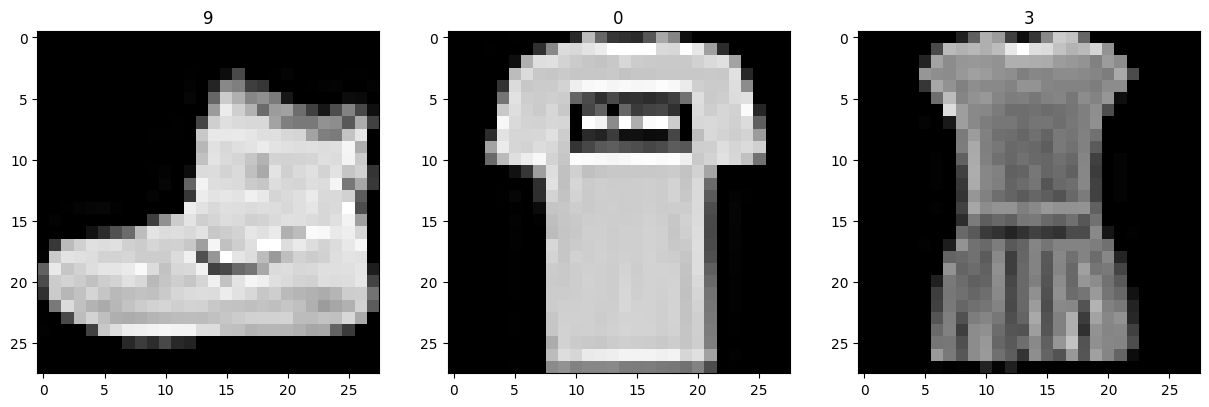

In [40]:
fig, ax = plt.subplots(1,3 , figsize=(15,8))
ax[0].imshow(x_train[0,:,:], cmap='gray')
ax[0].set_title(y_train[0])
ax[1].imshow(x_train[1,:,:], cmap='gray')
ax[1].set_title(y_train[1])
ax[2].imshow(x_train[3,:,:], cmap='gray')
ax[2].set_title(y_train[3])
plt.show()

#### __Comprender la transformacion de las imagenes__

Pero... ¿Cómo ingresa esta imagen a la red neuronal artificial?

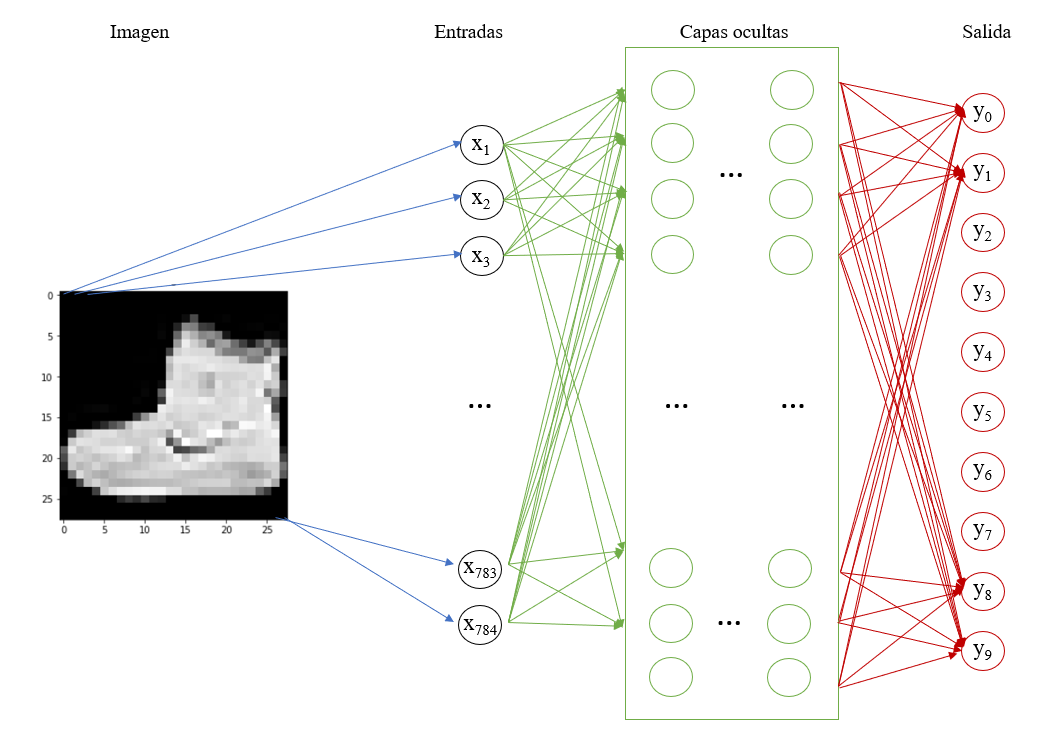

La imagen es una matriz de 28x28 y como vemos en la imagen anterior, cada pixel equivale a una entrada, por lo tanto hay que convertir la matriz de 28x28 en un vector de 784x1 y para esto usamos el método _reshape_

In [41]:
# aplanar imagenes: de 28x28 a 784 pixeles
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

Pero... ¿Cuál es la diferencia entre una imagen original y una redimensionada?

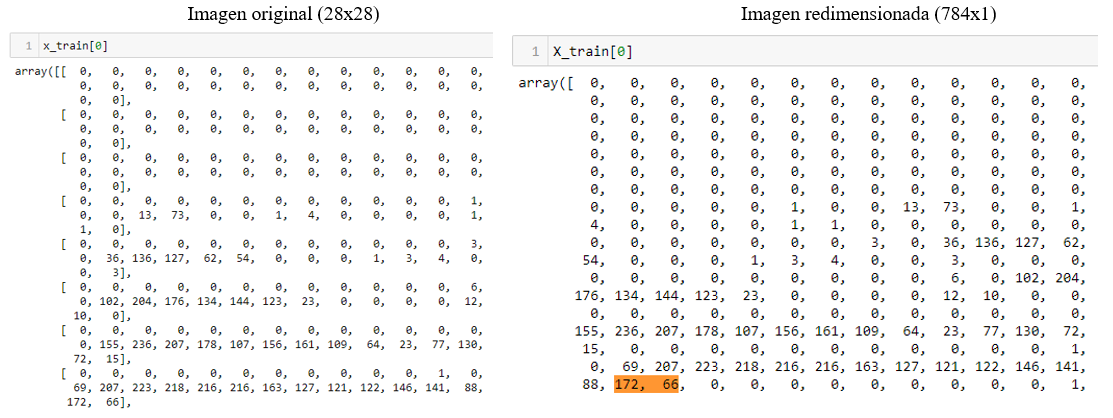

Luego de haber separado el conjunto de datos en _train_ y _test_, tenemos los siguientes tamaños de subset

In [42]:
print('Tamaño del X_train: ', X_train.shape)
print('Tamaño del y_train: ', y_train.shape)
print('Tamaño del X_test: ', X_test.shape)
print('Tamaño del y_test: ', y_test.shape)

Tamaño del X_train:  (60000, 784)
Tamaño del y_train:  (60000,)
Tamaño del X_test:  (10000, 784)
Tamaño del y_test:  (10000,)


#### __Estandarización de los datos de entrada__

_La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático: es posible que se comporten mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente (p. ej., gaussiana con media 0 y varianza unitaria)._<br>


$$z\ =\frac {(x\ -\ u)} {s}$$

$x$ : la muestra.<br>
$u$ : la media de todas las muestras.<br>
$s$ : la desviación estándar de todas las muestras.<br>


Para este propósito, scikit-learn tiene implementado el método __StandardScaler()__


Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Importamos las librerías y/o el método a utilizar para la estandarizacion

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

Ver los métodos:<br>
_fit_transform()_ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform" target="_blank">Link</a><br>
_transform()_ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform" target="_blank">Link</a>

#### __Convertir datos categoricos a numericos__

Para tener los datos de salida, se hace la transformación del vector de salida. Se usa el método __np_utils.to_categorical()__ de keras, el cual convierte un vector de clase (enteros) en una matriz de clase binaria.

In [45]:
from tensorflow.keras.utils import to_categorical
y_trainOHE = to_categorical([0,1,2,3,4,5,6,7,8,9])
for i , ohe in enumerate(y_trainOHE):
    print(i , '=>' ,ohe)

0 => [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 => [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 => [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 => [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 => [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 => [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7 => [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 => [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9 => [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Se hace la codificación

In [46]:
y_trainOHE = to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

In [47]:
print('Número de clases:', nb_classes)

Número de clases: 10


In [48]:
print('Ejemplo de la salida de la muestra 0 del conjunto de train: ', y_trainOHE[0])

Ejemplo de la salida de la muestra 0 del conjunto de train:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### __Información de la matriz de entrada a la red neuronal artificial__

In [49]:
input_dim = X_train.shape[1]

print("Tamaño de las imágenes (28x28) según la descripción del dataset: ",28*28)
print("La dimensión de la entrada (x) a la red: ", input_dim)

Tamaño de las imágenes (28x28) según la descripción del dataset:  784
La dimensión de la entrada (x) a la red:  784


## __Definiendo la arquitectura de la Red Neuronal Artificial - MLP__

Ya que se tienen las matrices de entrada y salida, tanto para entrenamiento (_train_) como para prueba (_test_), se procede a definir la arquitectura de la red, entrenar y validar.

Hay varios métodos para la creación de una Red Neuronal Artificial en Python. Para efectos de este ejercicio vamos a crear dos redes sencillas para ejemplificar dos de los métodos mas relevantes.

### __Método #1__

Se hace la importación de los métodos implementados en Scikit-Learn para la creación de una Red Neuronal Artificial

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Vamos a crear una red densa (_fully connected_) con __una capa interna de 32 neuronas__, donde la entrada será la imagen redimensionada anteriormente (__784,1__) y la __salida serán las 10 neuronas__ que contendrán la codificación __to_categorical()__ realizada en los pasos anteriores

In [51]:
model1 = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

In [52]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### __Método #2__

Se importan las librerías a usar

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Para este segundo caso, crearemos una red densa (_fully connected_) con __dos capas interna de 64 y 32 neuronas__, donde la entrada será la imagen redimensionada anteriormente (__784,1__) y la __salida serán las 10 neuronas__ que contendrán la codificación __np_utils.to_categorical()__ realizada en los pasos anteriores

In [54]:
model2 = Sequential()
model2.add(Dense(64, input_dim=input_dim , name='Hidden_Layer_1'))
model2.add(Activation('tanh' , name='tanh_1'))
model2.add(Dense(32 , name='Hidden_Layer_2'))
model2.add(Activation('tanh' , name='tanh_2'))
model2.add(Dense(nb_classes, activation='softmax' , name='Output_Layer'))

In [55]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 64)                50240     
                                                                 
 tanh_1 (Activation)         (None, 64)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                2080      
                                                                 
 tanh_2 (Activation)         (None, 32)                0         
                                                                 
 Output_Layer (Dense)        (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Un concepto para revisar en este punto, son las __Funciones de activación__

https://keras.io/api/layers/activations/

Una vez la arquitectura del modelo sea definida, el siguiente paso es configurar la función de pérdida y el optimizador

<a href="https://keras.io/api/optimizers/" target="_blank">Keras optimizers</a>
<br><br>
<a href="https://keras.io/api/losses/" target="_blank">Loss functions</a>

### __Entrenamiento del modelo #1__

In [56]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd')

In [57]:
print("Entrenando...")
model1.fit(X_trainN, y_trainOHE, epochs=1, batch_size=16, validation_split=0.1, verbose=2)

Entrenando...


2024-10-26 09:25:45.962909: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


3375/3375 - 9s - loss: 0.5456 - val_loss: 0.4301 - 9s/epoch - 3ms/step


Haciendo predicciones...


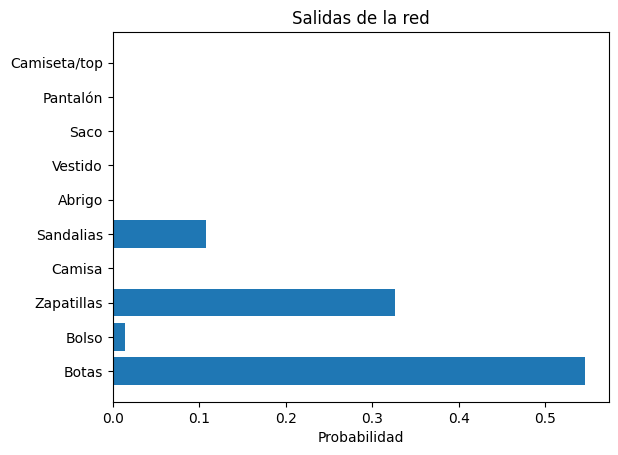

In [58]:
print("Haciendo predicciones...")
preds = model1.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
objects = ('Botas', 'Bolso', 'Zapatillas', 'Camisa', 'Sandalias', 'Abrigo', 'Vestido', 'Saco', 'Pantalón', 'Camiseta/top')
y_pos = np.arange(nb_classes)

plt.barh(y_pos[::-1], performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Probabilidad')
plt.title('Salidas de la red')
plt.show()

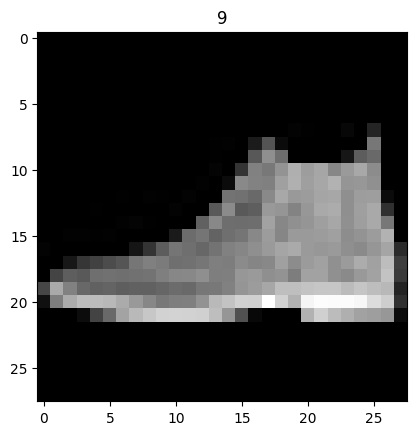

In [59]:
fig, ax = plt.subplots()
ax.imshow(x_test[0,:,:], cmap='gray')
ax.set_title(y_train[0])
plt.show()

Visualizando el vector de salida

In [60]:
preds[0]

array([4.7694825e-04, 9.4405812e-04, 1.4186839e-03, 1.5655101e-03,
       1.1018822e-03, 1.0776472e-01, 8.7725004e-04, 3.2597011e-01,
       1.3623450e-02, 5.4625732e-01], dtype=float32)

Visualizando el vector de salida en porcetaje

In [61]:
preds[0]*100

array([4.76948246e-02, 9.44058150e-02, 1.41868398e-01, 1.56551003e-01,
       1.10188216e-01, 1.07764721e+01, 8.77250060e-02, 3.25970116e+01,
       1.36234498e+00, 5.46257324e+01], dtype=float32)

In [62]:
preds = model1.predict(X_testN, verbose=0)
classes_x=np.argmax(preds,axis=1)
classes_x[:5]

array([9, 2, 1, 1, 6])

### __Entrenamiento del modelo #2__

In [63]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd')
print("Entrenando el modelo 2...")
model2.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Entrenando el modelo 2...
Epoch 1/10


2024-10-26 09:25:59.999085: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


3375/3375 - 11s - loss: 0.5436 - val_loss: 0.4257 - 11s/epoch - 3ms/step
Epoch 2/10
3375/3375 - 8s - loss: 0.3897 - val_loss: 0.3783 - 8s/epoch - 2ms/step
Epoch 3/10
3375/3375 - 8s - loss: 0.3500 - val_loss: 0.3623 - 8s/epoch - 2ms/step
Epoch 4/10
3375/3375 - 8s - loss: 0.3244 - val_loss: 0.3471 - 8s/epoch - 2ms/step
Epoch 5/10
3375/3375 - 8s - loss: 0.3042 - val_loss: 0.3389 - 8s/epoch - 2ms/step
Epoch 6/10
3375/3375 - 8s - loss: 0.2876 - val_loss: 0.3367 - 8s/epoch - 2ms/step
Epoch 7/10
3375/3375 - 8s - loss: 0.2738 - val_loss: 0.3365 - 8s/epoch - 2ms/step
Epoch 8/10
3375/3375 - 9s - loss: 0.2614 - val_loss: 0.3369 - 9s/epoch - 3ms/step
Epoch 9/10
3375/3375 - 9s - loss: 0.2503 - val_loss: 0.3329 - 9s/epoch - 3ms/step
Epoch 10/10
3375/3375 - 9s - loss: 0.2394 - val_loss: 0.3297 - 9s/epoch - 3ms/step


Haciendo predicciones...


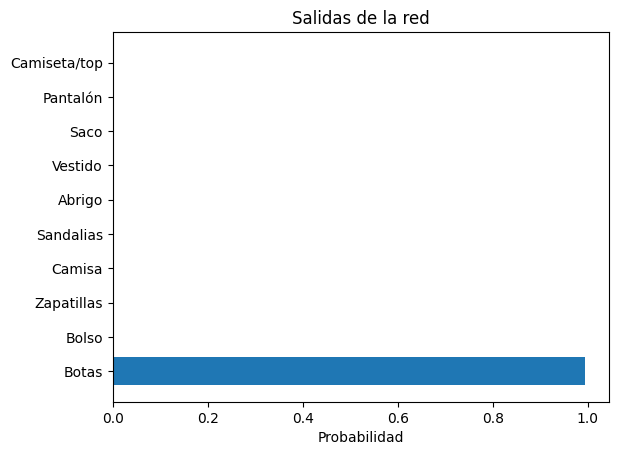

In [64]:
print("Haciendo predicciones...")
preds = model2.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
objects = ('Botas', 'Bolso', 'Zapatillas', 'Camisa', 'Sandalias', 'Abrigo', 'Vestido', 'Saco', 'Pantalón', 'Camiseta/top')
y_pos = np.arange(nb_classes)

plt.barh(y_pos[::-1], performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Probabilidad')
plt.title('Salidas de la red')
plt.show()

Visualizando el vector de salida en porcetaje

In [65]:
preds[0]*100

array([1.3155711e-04, 1.8207897e-03, 1.0262220e-03, 1.1069139e-02,
       1.0399440e-03, 2.9622990e-01, 3.7723142e-03, 2.3467685e-01,
       1.0930230e-02, 9.9439301e+01], dtype=float32)